# UE19CS390B – Capstone Project Phase – 2 #
# Interpretability of a joint learning problem by combining graph and text #

## Import Packages ##

In [1]:
import networkx as nx
import gzip
import ujson as json
import itertools
# import treelib
import numpy as np
import matplotlib.pyplot as plt
from torch_geometric.utils.convert import from_networkx
import torch_geometric.utils.convert
from torch_geometric.loader import DataLoader
import pandas as pd
import torch

In [2]:
print(torch.__version__)


1.11.0


In [3]:
df1=pd.read_csv(r"C:\Users\91900\Capstone\cap-main\finalirmap.csv")
df1.dtypes

id             int64
created_at    object
text          object
text_info     object
dtype: object

In [4]:
df_all=pd.read_csv(r"C:\Users\91900\Capstone\cap-main\alldatasetspre.csv")
df_all

,label,text
0,informative,rt gizmodo wildfires raging northern californi...
1,informative,photos deadly wildfires rage california
2,informative,rt cal oes pls share capturing wildfire respon...
3,informative,rt cal oes pls share capturing wildfire respon...
4,informative,rt time california raging wildfires never seen
...,...,...
18077,not_informative,get mora try whole menu
18078,not_informative,mirka mora b 1928 noted french born australian...
18079,not_informative,paulmalignaggi lol u sergio mora horn winning
18080,not_informative,cameroon 4 female suicide bombers kill 1 mora


In [5]:
df_hyd = pd.read_csv(r"C:\Users\91900\tweetids4 (2).csv")
df_hyd

,coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,...,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_screen_name,user_statuses_count,user_time_zone,user_urls,user_verified
0,NaN,Thu Sep 07 02:54:38 +0000 2017,NaN,https://twitter.com/FinanceRadr/status/9056253...,http://www.finance-radar.com/dramatic-photo-sh...,0,905625325723373568,NaN,NaN,NaN,...,394,639,9,"Washington, DC",Finance Radar,FinanceRadr,109980,NaN,NaN,False
1,NaN,Thu Sep 07 03:16:46 +0000 2017,chsnews,https://twitter.com/Live5News/status/905630740...,http://www.live5news.com/story/36250937/eye-of...,0,905630897541718017,NaN,NaN,NaN,...,441,659,22,"Sea Islands, South Carolina",Devo,devonna_ann,8605,NaN,NaN,False
2,NaN,Thu Sep 07 02:53:58 +0000 2017,HurricaneIrma,https://twitter.com/RawStory/status/9054742573...,http://www.rawstory.com/2017/09/here-are-6-ter...,0,905625160904044549,NaN,NaN,NaN,...,920,2258,34,"California, USA",JT Styl,JTSTYL,94587,NaN,NaN,False
3,NaN,Thu Sep 07 03:17:09 +0000 2017,storm irma hurricaneirma2017 santiago,https://twitter.com/travelingJolie/status/9056...,NaN,0,905630995998748674,NaN,NaN,NaN,...,1819,4832,282,"Zurich, Switzerland",Nikolay Bakaltchev,nikolaygb,4096,NaN,https://www.linkedin.com/in/nikolaybakaltchev,False
4,NaN,Thu Sep 07 02:54:15 +0000 2017,NaN,https://twitter.com/thehill/status/90548049233...,http://hill.cm/fGLBoBy,0,905625230843846656,NaN,NaN,NaN,...,56,55,8,Oregon,Melissa H,dahllaz,57164,NaN,http://triggerhappy.livejournal.com/,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3142,NaN,Tue Sep 19 21:38:32 +0000 2017,Trump Harvey Irma Maria RocketMan,https://twitter.com/dominicalicia99/status/910...,NaN,0,910256821134401536,CNN,9.102488e+17,759251.0,...,167,1009,6,United States,I'm fucking trying☢️🙏🏾,JFK19171963,15117,NaN,https://www.whitehouse.gov/,False
3143,NaN,Tue Sep 19 22:32:45 +0000 2017,Irma,https://twitter.com/CamdenCountyEMA/status/910...,NaN,0,910270462822895617,NaN,NaN,NaN,...,591,61,23,"Kingsland, GA",Camden County EMA,CamdenCountyEMA,4635,NaN,https://www.camdencountyga.gov/81/Emergency-Ma...,False
3144,NaN,Tue Sep 19 22:33:06 +0000 2017,HurricaneMaria Irma,https://twitter.com/multimenon/status/91027055...,NaN,0,910270554812317697,multimenon,9.056298e+17,14713315.0,...,1090,709,29,(223/717),Nikhil Menon,multimenon,41946,NaN,https://nikhilmenon.in,False
3145,NaN,Tue Sep 19 22:33:16 +0000 2017,NaN,https://twitter.com/WewokaChronicle/status/910...,http://ti.me/2hfXnfD,0,910270595262291968,NaN,NaN,NaN,...,1533,3859,183,"Wewoka, OK",Jake Davis,WewokaChronicle,208925,NaN,http://writers.work/jakedavis,False


In [6]:
df_join = pd.merge(df_hyd.drop_duplicates(), df1.drop_duplicates(), on='id', how='inner')
df_join.drop_duplicates()

,coordinates,created_at_x,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,...,user_location,user_name,user_screen_name,user_statuses_count,user_time_zone,user_urls,user_verified,created_at_y,text_y,text_info
0,NaN,Thu Sep 07 02:54:38 +0000 2017,NaN,https://twitter.com/FinanceRadr/status/9056253...,http://www.finance-radar.com/dramatic-photo-sh...,0,905625325723373568,NaN,NaN,NaN,...,"Washington, DC",Finance Radar,FinanceRadr,109980,NaN,NaN,False,Thu Sep 07 02:54:38 +0000 2017,dramatic photo shows sunny moment zen chaos hu...,informative
1,NaN,Thu Sep 07 03:16:46 +0000 2017,chsnews,https://twitter.com/Live5News/status/905630740...,http://www.live5news.com/story/36250937/eye-of...,0,905630897541718017,NaN,NaN,NaN,...,"Sea Islands, South Carolina",Devo,devonna_ann,8605,NaN,NaN,False,Thu Sep 07 03:16:46 +0000 2017,new track puts hurricane irma near sc coast mo...,informative
2,NaN,Thu Sep 07 02:53:58 +0000 2017,HurricaneIrma,https://twitter.com/RawStory/status/9054742573...,http://www.rawstory.com/2017/09/here-are-6-ter...,0,905625160904044549,NaN,NaN,NaN,...,"California, USA",JT Styl,JTSTYL,94587,NaN,NaN,False,Thu Sep 07 02:53:58 +0000 2017,6 terrifying reasons fear miami survive hurric...,informative
3,NaN,Thu Sep 07 03:17:09 +0000 2017,storm irma hurricaneirma2017 santiago,https://twitter.com/travelingJolie/status/9056...,NaN,0,905630995998748674,NaN,NaN,NaN,...,"Zurich, Switzerland",Nikolay Bakaltchev,nikolaygb,4096,NaN,https://www.linkedin.com/in/nikolaybakaltchev,False,Thu Sep 07 03:17:09 +0000 2017,tha calm storm pretty eerie afternoon irma hur...,informative
4,NaN,Thu Sep 07 02:54:15 +0000 2017,NaN,https://twitter.com/thehill/status/90548049233...,http://hill.cm/fGLBoBy,0,905625230843846656,NaN,NaN,NaN,...,Oregon,Melissa H,dahllaz,57164,NaN,http://triggerhappy.livejournal.com/,False,Thu Sep 07 02:54:15 +0000 2017,puerto rico could without power 4 6 months hur...,informative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,NaN,Tue Sep 19 21:38:32 +0000 2017,Trump Harvey Irma Maria RocketMan,https://twitter.com/dominicalicia99/status/910...,NaN,0,910256821134401536,CNN,9.102488e+17,759251.0,...,United States,I'm fucking trying☢️🙏🏾,JFK19171963,15117,NaN,https://www.whitehouse.gov/,False,Tue Sep 19 21:38:32 +0000 2017,cnn rocket man takes strikes amp destroys mexi...,informative
3146,NaN,Tue Sep 19 22:32:45 +0000 2017,Irma,https://twitter.com/CamdenCountyEMA/status/910...,NaN,0,910270462822895617,NaN,NaN,NaN,...,"Kingsland, GA",Camden County EMA,CamdenCountyEMA,4635,NaN,https://www.camdencountyga.gov/81/Emergency-Ma...,False,Tue Sep 19 22:32:45 +0000 2017,local resources irma,informative
3147,NaN,Tue Sep 19 22:33:06 +0000 2017,HurricaneMaria Irma,https://twitter.com/multimenon/status/91027055...,NaN,0,910270554812317697,multimenon,9.056298e+17,14713315.0,...,(223/717),Nikhil Menon,multimenon,41946,NaN,https://nikhilmenon.in,False,Tue Sep 19 22:33:06 +0000 2017,whoa delta pull one last minute inbound flight...,informative
3148,NaN,Tue Sep 19 22:33:16 +0000 2017,NaN,https://twitter.com/WewokaChronicle/status/910...,http://ti.me/2hfXnfD,0,910270595262291968,NaN,NaN,NaN,...,"Wewoka, OK",Jake Davis,WewokaChronicle,208925,NaN,http://writers.work/jakedavis,False,Tue Sep 19 22:33:16 +0000 2017,new story science amp health time cardi b comp...,not_informative


In [7]:
df_join.columns

Index(['coordinates', 'created_at_x', 'hashtags', 'media', 'urls',
       'favorite_count', 'id', 'in_reply_to_screen_name',
       'in_reply_to_status_id', 'in_reply_to_user_id', 'lang', 'place',
       'possibly_sensitive', 'quote_id', 'retweet_count', 'retweet_id',
       'retweet_screen_name', 'source', 'text_x', 'tweet_url',
       'user_created_at', 'user_id', 'user_default_profile_image',
       'user_description', 'user_favourites_count', 'user_followers_count',
       'user_friends_count', 'user_listed_count', 'user_location', 'user_name',
       'user_screen_name', 'user_statuses_count', 'user_time_zone',
       'user_urls', 'user_verified', 'created_at_y', 'text_y', 'text_info'],
      dtype='object')

In [9]:
df1.drop_duplicates()["id"].value_counts()

909938122309353472    2
909976839006949376    2
910261997660459013    2
909693496579301376    2
909913791865004033    2
                     ..
909718650403393539    1
909718759618826240    1
909718789943709696    1
909718820968833030    1
910270769653075969    1
Name: id, Length: 3143, dtype: int64

In [10]:
df1

,id,created_at,text,text_info
0,905625009430949888,Thu Sep 07 02:53:22 +0000 2017,island barbuda literally water hurricane irma,informative
1,905625059326353409,Thu Sep 07 02:53:34 +0000 2017,11pm hurricane irma update abc7news weather,informative
2,905625064451833856,Thu Sep 07 02:53:35 +0000 2017,hurricane irma destroys upwards 90 barbuda off...,informative
3,905625073628975106,Thu Sep 07 02:53:37 +0000 2017,5 pm track update hurricane irma flwx gawx jaxwx,informative
4,905625088300654592,Thu Sep 07 02:53:41 +0000 2017,11 pm advisory hurricane irma firstalertwx,informative
...,...,...,...,...
3515,910270036861886465,Tue Sep 19 22:31:03 +0000 2017,hurricane irma first impacts nassau bahamas 9 ...,informative
3516,910270462822895617,Tue Sep 19 22:32:45 +0000 2017,local resources irma,informative
3517,910270554812317697,Tue Sep 19 22:33:06 +0000 2017,whoa delta pull one last minute inbound flight...,informative
3518,910270595262291968,Tue Sep 19 22:33:16 +0000 2017,new story science amp health time cardi b comp...,not_informative


In [11]:
s='Tue Sep 19 15:47:08 +0000 2017'
ts_list = pd.to_datetime([s], infer_datetime_format=True)
#print(ts_list.values)
import dateutil.parser as parser
parser.parse(s)

def time_parser(ts):
    dobject=parser.parse(ts)
    return  dobject

In [12]:
from transformers import BertForSequenceClassification, AdamW, BertConfig, BertTokenizer


In [13]:
import torch

if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

No GPU available, using the CPU instead.


## Import BERT Model ##

In [14]:
output_dir = './model_save/'

bert = BertForSequenceClassification.from_pretrained(output_dir)
tokenizer = BertTokenizer.from_pretrained(output_dir)

bert.to(device)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

In [15]:
def getEmbed(text):
    
    marked_text = "[CLS] " + text + " [SEP]"

    tokenized_text = tokenizer.tokenize(marked_text)

    indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_text)


    segments_ids = [1] * len(tokenized_text)
    
    tokens_tensor = torch.tensor([indexed_tokens])
    segments_tensors = torch.tensor([segments_ids])
    bert.eval()
    with torch.no_grad():

        outputs = bert(tokens_tensor, segments_tensors)

    
        hidden_states = outputs[1]
        token_vecs = hidden_states[-2][0]
        sentence_embedding = torch.mean(token_vecs, dim=0)
        res=sentence_embedding.numpy()
        return list(res)

## Create Conversation Graphs ##

In [16]:
import os
cwd=r"C:\Users\91900\Capstone\cap-main\convos"
data_arr=[]
for filename in os.listdir(cwd):
    fname=os.path.join(cwd, filename)
    data = pd.read_json(fname, lines=True)
    #print(data['includes'])
    rootid=int(filename[:-6])
    r=df_join.loc[df_join['id']==rootid,['favorite_count', 'retweet_count', 'user_followers_count', 'user_listed_count', 'user_verified', 'text_info']]
    f,r,uf,ul,uv,label = r.values[0] 
    if uv == True:
        uv = 1
    else:
        uv = 0 
    d={}
    d[rootid]={'favorite_count': getEmbed((str(f))), 'retweet_count': getEmbed((str(r))), 'user_followers_count': getEmbed((str(uf))), 'user_listed_count': getEmbed((str(ul))), 'user_verified': getEmbed((str(uv)))}
    G=nx.DiGraph()
    G.add_node(rootid)
        
    for i,j in zip(data['data'][0], data["includes"]):
        G.add_node(int(i['id']))
        #d[int(i['id'])]={'time': getEmbed(i['created_at']),'text': getEmbed(i['text'])}
        #print(type(getEmbed(str(i["public_metrics"]['like_count']))))
        #print(i["public_metrics"]['retweet_count']
        if j["users"][0]["verified"]==True:
            uv_1 = 1
        else: 
            uv_1 = 0
        d[int(i['id'])]={'favorite_count': getEmbed((str(i["public_metrics"]['like_count']))),'retweet_count': getEmbed((str(i["public_metrics"]['retweet_count']))), 'user_followers_count':  getEmbed((str(j["users"][0]["public_metrics"]['followers_count']))), 'user_listed_count':  getEmbed((str(j["users"][0]["public_metrics"]['listed_count']))), 'user_verified':  getEmbed((str(uv_1)))}
        #print(d[int(i['id'])])
        G.add_edge(int(i['id']),int(i['referenced_tweets'][0]['id']))

    
    H = G.to_undirected()
    Gcc = sorted(nx.connected_components(H), key=len, reverse=True)
    G0 = G.subgraph(Gcc[0])
    G1=G0.to_directed()
    #nx.draw(G1,with_labels=True)
    #print(d)
    nx.set_node_attributes(G1, d)
    #print(nx.get_node_attributes(G1,'favorite_count'))

    try:
        g_data=from_networkx(G1, group_node_attrs=['favorite_count', 'retweet_count', 'user_followers_count', 'user_listed_count', 'user_verified'])
        #print(rootid)
        #g_data=from_networkx(G1)
        g_data.y=0 if label=='informative' else 1
        data_arr.append(g_data)
    except Exception as e: print(e)
    
        
print(len(data_arr))

Not all nodes contain the same attributes
Not all nodes contain the same attributes
Not all nodes contain the same attributes
Not all nodes contain the same attributes
Not all nodes contain the same attributes
Not all nodes contain the same attributes
Not all nodes contain the same attributes
Not all nodes contain the same attributes
Not all nodes contain the same attributes
Not all nodes contain the same attributes
Not all nodes contain the same attributes
Not all nodes contain the same attributes
Not all nodes contain the same attributes
Not all nodes contain the same attributes
Not all nodes contain the same attributes
Not all nodes contain the same attributes
Not all nodes contain the same attributes
Not all nodes contain the same attributes
Not all nodes contain the same attributes
Not all nodes contain the same attributes
Not all nodes contain the same attributes
Not all nodes contain the same attributes
Not all nodes contain the same attributes
Not all nodes contain the same att

In [17]:
dataset=data_arr
data=dataset[0]

In [18]:
print(dataset[110])

Data(edge_index=[2, 1], x=[2, 3840], y=0)


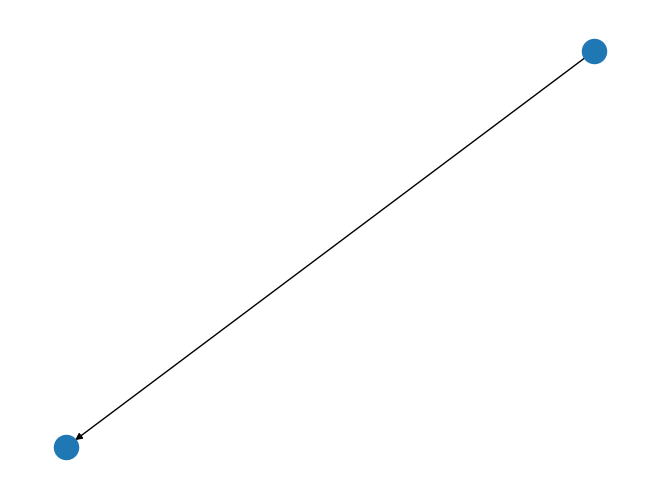

In [19]:
import networkx as nx
from torch_geometric.utils import to_networkx
G1 = to_networkx(dataset[110], to_undirected=False)
nx.draw(G1)

In [20]:
G1.nodes(data=True)

NodeDataView({0: {}, 1: {}})

In [21]:

print()
print(data)
print('=============================================================')

# Gather some statistics about the first graph.
print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')
print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
print(f'Has isolated nodes: {data.has_isolated_nodes()}')
print(f'Has self-loops: {data.has_self_loops()}')
print(f'Is undirected: {data.is_undirected()}')


Data(edge_index=[2, 1], x=[2, 3840], y=1)
Number of nodes: 2
Number of edges: 1
Average node degree: 0.50
Has isolated nodes: False
Has self-loops: False
Is undirected: False


## Test-Train Split ##

In [22]:
import torch
from random import shuffle
torch.manual_seed(12345)
shuffle(dataset)

train_dataset = dataset[:198]
test_dataset = dataset[198:]

print(f'Number of training graphs: {len(train_dataset)}')
print(f'Number of test graphs: {len(test_dataset)}')

Number of training graphs: 198
Number of test graphs: 52


In [23]:
from torch_geometric.loader import DataLoader

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

for step, data in enumerate(train_loader):
    print(f'Step {step + 1}:')
    print('=======')
    print(f'Number of graphs in the current batch: {data.num_graphs}')
    print(data)
    print()

Step 1:
Number of graphs in the current batch: 64
DataBatch(edge_index=[2, 64], x=[128, 3840], y=[64], batch=[128], ptr=[65])

Step 2:
Number of graphs in the current batch: 64
DataBatch(edge_index=[2, 64], x=[128, 3840], y=[64], batch=[128], ptr=[65])

Step 3:
Number of graphs in the current batch: 64
DataBatch(edge_index=[2, 64], x=[128, 3840], y=[64], batch=[128], ptr=[65])

Step 4:
Number of graphs in the current batch: 6
DataBatch(edge_index=[2, 6], x=[12, 3840], y=[6], batch=[12], ptr=[7])



## Graph Convolution Network ##

In [60]:
from torch.nn import Linear
import torch.nn.functional as F
from torch_geometric.nn import GCNConv,GNNExplainer
from torch_geometric.nn import global_mean_pool


class GCN(torch.nn.Module):
    def __init__(self, hidden_channels):
        super(GCN, self).__init__()
        torch.manual_seed(456)
        self.fc=768
        self.conv1 = GCNConv(3840, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, hidden_channels)
        self.conv3 = GCNConv(hidden_channels, hidden_channels)
        self.lin = Linear(hidden_channels, 2)

    def forward(self, x, edge_index, batch):
        # 1. Obtain node embeddings 
        x = self.conv1(x, edge_index)
        x = x.relu()
        x = self.conv2(x, edge_index)
        #x = x.relu()
        #x = self.conv3(x, edge_index)

        # 2. Readout layer
        x = global_mean_pool(x, batch)  # [batch_size, hidden_channels]
        self.emb=x

        # 3. Apply a final classifier
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.lin(x)
        print('x_shape:',x.shape)
        return x

model = GCN(hidden_channels=64)
print(model)

GCN(
  (conv1): GCNConv(3840, 64)
  (conv2): GCNConv(64, 64)
  (conv3): GCNConv(64, 64)
  (lin): Linear(in_features=64, out_features=2, bias=True)
)


## Train Accuracy: 88.14 Test Accuracy: 73.81 ##

In [61]:
model1 = GCN(hidden_channels=64)
optimizer = torch.optim.Adam(model1.parameters(), lr=0.01)
criterion = torch.nn.CrossEntropyLoss()

def train():
    model1.train()

    for data in train_loader:  # Iterate in batches over the training dataset.
         out = model1(data.x.type(torch.FloatTensor), data.edge_index.type(torch.LongTensor), data.batch.type(torch.LongTensor))  # Perform a single forward pass.
         loss = criterion(out, data.y)  # Compute the loss.
         loss.backward()  # Derive gradients.
         optimizer.step()  # Update parameters based on gradients.
         optimizer.zero_grad()  # Clear gradients.

def test(loader):
     model1.eval()

     correct = 0
     for data in loader:  # Iterate in batches over the training/test dataset.
         
         out = model1(data.x, data.edge_index, data.batch)  
         pred = out.argmax(dim=1)  # Use the class with highest probability.
         correct += int((pred == data.y).sum())  # Check against ground-truth labels.
         print(pred)
     return correct / len(loader.dataset)  # Derive ratio of correct predictions.

total_sum1=0
total_sum2=0
for epoch in range(1, 51):
    train()
    train_acc = test(train_loader)
    test_acc = test(test_loader)
    total_sum1 = train_acc + total_sum1
    total_sum2 = test_acc + total_sum2
    print(f'Epoch: {epoch:03d}, Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}')
avg1 = total_sum1/50
avg2 = total_sum2/50
print(avg1, avg2)

x_shape: torch.Size([64, 2])
x_shape: torch.Size([64, 2])
x_shape: torch.Size([64, 2])
x_shape: torch.Size([6, 2])
x_shape: torch.Size([64, 2])
tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
x_shape: torch.Size([64, 2])
tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
x_shape: torch.Size([64, 2])
tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
x_shape: torch.Size([6, 2])
tensor([1, 1, 1, 1, 1, 1])
x_shape: torch.Size([52, 2])
tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

x_shape: torch.Size([64, 2])
x_shape: torch.Size([6, 2])
x_shape: torch.Size([64, 2])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
x_shape: torch.Size([64, 2])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
x_shape: torch.Size([64, 2])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
x_shape: torch.Size([6, 2])
tensor([0, 0, 0, 0, 0, 0])
x_shape: torch.Size([52, 2])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

x_shape: torch.Size([64, 2])
x_shape: torch.Size([64, 2])
x_shape: torch.Size([64, 2])
x_shape: torch.Size([6, 2])
x_shape: torch.Size([64, 2])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
x_shape: torch.Size([64, 2])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
x_shape: torch.Size([64, 2])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
x_shape: torch.Size([6, 2])
tensor([0, 0, 0, 0, 0, 0])
x_shape: torch.Size([52, 2])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

x_shape: torch.Size([6, 2])
x_shape: torch.Size([64, 2])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
x_shape: torch.Size([64, 2])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
x_shape: torch.Size([64, 2])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
x_shape: torch.Size([6, 2])
tensor([0, 0, 0, 0, 0, 0])
x_shape: torch.Size([52, 2])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

x_shape: torch.Size([6, 2])
x_shape: torch.Size([64, 2])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
x_shape: torch.Size([64, 2])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
x_shape: torch.Size([64, 2])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
x_shape: torch.Size([6, 2])
tensor([0, 0, 0, 0, 0, 0])
x_shape: torch.Size([52, 2])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

x_shape: torch.Size([64, 2])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
x_shape: torch.Size([64, 2])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
x_shape: torch.Size([6, 2])
tensor([0, 0, 0, 0, 0, 0])
x_shape: torch.Size([52, 2])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0])
Epoch: 044, Train Acc: 0.8131, Test Acc: 0.9038
x_shape: torch.Size([64, 2])
x_shape: torch.Size([64, 2])
x_shape: torch.Size([64, 2])
x_shape: torch.Size([6, 2])
x_shape: torch.Size([64, 2])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

## Graph Attention Network ##

In [28]:
from torch_geometric.nn import GATConv

class GAT(torch.nn.Module):
    def __init__(self):
        super(GAT, self).__init__()
        self.hid = 8
        self.in_head = 8
        self.out_head = 1
        
        
        self.conv1 = GATConv(3840, self.hid, heads=self.in_head, dropout=0.4)
        self.conv2 = GATConv(self.hid*self.in_head, 2, concat=False,
                             heads=self.out_head, dropout=0.4)



    def forward(self, x, edge_index, batch):
        # 1. Obtain node embeddings 
        x = self.conv1(x, edge_index)
        x = x.relu()
        x = self.conv2(x, edge_index)

        # 2. Readout layer
        x = global_mean_pool(x, batch)  # [batch_size, hidden_channels]
        emb=x
        # 3. Apply a final classifier
        x = F.dropout(x, p=0.3, training=self.training)
        
        return F.log_softmax(x, dim=1)
    
    
    
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device = "cpu"

model = GAT()

## Train Accuracy: 88.58 Test Accuracy: 77.74 ##

In [29]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = torch.nn.CrossEntropyLoss()

def train():
    model.train()

    for data in train_loader:  # Iterate in batches over the training dataset.
         out = model(data.x, data.edge_index, data.batch)  # Perform a single forward pass.
         #print(out)
         loss = criterion(out, data.y)  # Compute the loss.
         loss.backward()  # Derive gradients.
         optimizer.step()  # Update parameters based on gradients.
         optimizer.zero_grad()  # Clear gradients.

def test(loader):
     model.eval()

     correct = 0
     for data in loader:  # Iterate in batches over the training/test dataset.
         out = model(data.x, data.edge_index, data.batch)  
         #print(out)
         pred = out.argmax(dim=1)  # Use the class with highest probability.
         print(pred)
         correct += int((pred == data.y).sum())  # Check against ground-truth labels.
     return correct / len(loader.dataset)  # Derive ratio of correct predictions.

total_sum1=0
total_sum2=0
for epoch in range(1, 51):
    train()
    train_acc = test(train_loader)
    test_acc = test(test_loader)
    total_sum1 = train_acc + total_sum1
    total_sum2 = test_acc + total_sum2
    print(f'Epoch: {epoch:03d}, Train Acc: {train_acc:.4f}, Test Acc: {test_acc:.4f}')
avg1 = total_sum1/50
avg2 = total_sum2/50
print(avg1, avg2)

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
tensor([0, 0, 0, 0, 0, 0])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0])
Epoch: 001, Train Acc: 0.8131, Test Acc: 0.9038
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0,

tensor([0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0])
tensor([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])
tensor([0, 0, 0, 1, 0, 0])
tensor([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0])
Epoch: 012, Train Acc: 0.8687, Test Acc: 0.8269
tensor([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0,

Epoch: 022, Train Acc: 0.8838, Test Acc: 0.8654
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
tensor([0, 0, 0, 0, 0, 0])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0])
Epoch: 023, Train Acc: 0.8131, Test Acc: 0.9038
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
tensor([0, 0, 0, 0, 0, 0])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0])
Epoch: 032, Train Acc: 0.8283, Test Acc: 0.9038
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0,

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
tensor([0, 0, 0, 0, 0, 0])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0])
Epoch: 043, Train Acc: 0.8182, Test Acc: 0.9038
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0,

## Create Joint Dataset ##

In [48]:
import os
cwd=r"C:\Users\91900\Capstone\cap-main\convos"
data_arr=[]
for filename in os.listdir(cwd):
    fname=os.path.join(cwd, filename)
    data = pd.read_json(fname, lines=True)
    #print(data['includes'])
    rootid=int(filename[:-6])
    r=df_join.loc[df_join['id']==rootid,['text_y', 'favorite_count', 'retweet_count', 'user_followers_count', 'user_listed_count', 'user_verified', 'text_info']]
    t, f,r,uf,ul,uv,label = r.values[0] 
    if uv == True:
        uv = 1
    else:
        uv = 0 
    d={}
    d[rootid]={'favorite_count': getEmbed((str(f))), 'retweet_count': getEmbed((str(r))), 'user_followers_count': getEmbed((str(uf))), 'user_listed_count': getEmbed((str(ul))), 'user_verified': getEmbed((str(uv)))}
    G=nx.DiGraph()
    G.add_node(rootid)
        
    for i,j in zip(data['data'][0], data["includes"]):
        G.add_node(int(i['id']))
        #d[int(i['id'])]={'time': getEmbed(i['created_at']),'text': getEmbed(i['text'])}
        #print(type(getEmbed(str(i["public_metrics"]['like_count']))))
        #print(i["public_metrics"]['retweet_count']
        if j["users"][0]["verified"]==True:
            uv_1 = 1
        else: 
            uv_1 = 0
        d[int(i['id'])]={'favorite_count': getEmbed((str(i["public_metrics"]['like_count']))),'retweet_count': getEmbed((str(i["public_metrics"]['retweet_count']))), 'user_followers_count':  getEmbed((str(j["users"][0]["public_metrics"]['followers_count']))), 'user_listed_count':  getEmbed((str(j["users"][0]["public_metrics"]['listed_count']))), 'user_verified':  getEmbed((str(uv_1)))}
        #print(d[int(i['id'])])
        G.add_edge(int(i['id']),int(i['referenced_tweets'][0]['id']))

    
    H = G.to_undirected()
    Gcc = sorted(nx.connected_components(H), key=len, reverse=True)
    G0 = G.subgraph(Gcc[0])
    G1=G0.to_directed()
    #nx.draw(G1,with_labels=True)
    #print(d)
    nx.set_node_attributes(G1, d)
    #print(nx.get_node_attributes(G1,'favorite_count'))

    try:
        g_data=from_networkx(G1, group_node_attrs=['favorite_count', 'retweet_count', 'user_followers_count', 'user_listed_count', 'user_verified'])
        lab=0 if label=='informative' else 1
        g_data.y=lab
        data_arr.append((t,g_data,lab))
        count+=1
        print("done ",count)
        
    except:
        continue
print(data_arr[0])

done  1
done  2
done  3
done  4
done  5
done  6
done  7
done  8
done  9
done  10
done  11
done  12
done  13
done  14
done  15
done  16
done  17
done  18
done  19
done  20
done  21
done  22
done  23
done  24
done  25
done  26
done  27
done  28
done  29
done  30
done  31
done  32
done  33
done  34
done  35
done  36
done  37
done  38
done  39
done  40
done  41
done  42
done  43
done  44
done  45
done  46
done  47
done  48
done  49
done  50
done  51
done  52
done  53
done  54
done  55
done  56
done  57
done  58
done  59
done  60
done  61
done  62
done  63
done  64
done  65
done  66
done  67
done  68
done  69
done  70
done  71
done  72
done  73
done  74
done  75
done  76
done  77
done  78
done  79
done  80
done  81
done  82
done  83
done  84
done  85
done  86
done  87
done  88
done  89
done  90
done  91
done  92
done  93
done  94
done  95
done  96
done  97
done  98
done  99
done  100
done  101
done  102
done  103
done  104
done  105
done  106
done  107
done  108
done  109
done  110
done  11

In [49]:
darr=data_arr


In [50]:
from interpret_text.experimental.common.utils_bert import Language, Tokenizer, BERTSequenceClassifier
from interpret_text.experimental.common.timer import Timer
from interpret_text.experimental.unified_information import UnifiedInformationExplainer
interpretBERT=torch.load('./model.ckpt')
interpretBERT
tokenizerIP=torch.load('./token.ckpt')
tokenizerIP
MAX_LEN=100

## Joint Model ##

In [62]:
class Joint(torch.nn.Module):
    def __init__(self,bert,gnn):
        super(Joint,self).__init__()
        self.bert=bert
        self.gnn=gnn
        self.fc1=Linear(832,64)
        self.fc2=Linear(64,2)
    
    def forward(self,x1,x2):
        textemb=torch.tensor(getEmbed(x1))
        tokens_text = tokenizerIP.tokenize([str(x1).lower()])
        tokens_text, mask_text, _ = tokenizerIP.preprocess_classification_tokens(tokens_text, MAX_LEN)
        o1=interpretBERT.predict(token_ids=tokens_text,input_mask=mask_text, batch_size=64)
        o2=self.gnn(x2.x,x2.edge_index,batch=None)
        pred = o2.argmax(dim=1)  
        
        
        x = torch.cat([textemb, torch.tensor(self.gnn.emb[0])], dim=-1)
        x=self.fc1(F.relu(x))
        x=self.fc2(F.relu(x))
        return x,o1,pred
    

In [63]:
for param in bert.parameters():
    param.requires_grad = False
for param in model1.parameters():
    param.requires_grad = False

jmodel=Joint(bert,model1)
print(jmodel)


Joint(
  (bert): BertForSequenceClassification(
    (bert): BertModel(
      (embeddings): BertEmbeddings(
        (word_embeddings): Embedding(30522, 768, padding_idx=0)
        (position_embeddings): Embedding(512, 768)
        (token_type_embeddings): Embedding(2, 768)
        (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (encoder): BertEncoder(
        (layer): ModuleList(
          (0): BertLayer(
            (attention): BertAttention(
              (self): BertSelfAttention(
                (query): Linear(in_features=768, out_features=768, bias=True)
                (key): Linear(in_features=768, out_features=768, bias=True)
                (value): Linear(in_features=768, out_features=768, bias=True)
                (dropout): Dropout(p=0.1, inplace=False)
              )
              (output): BertSelfOutput(
                (dense): Linear(in_features=768, out_features=768, bias=True)
      

In [64]:
from sklearn.model_selection import train_test_split
X=[[a[0],a[1]] for a in darr ]
y=[a[2] for a in darr]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [65]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=jmodel.parameters(), lr=1e-3)


for epoch in range(5):
    running_loss = 0.0
    for i in range(len(X_train)):
        x1,x2=X_train[i]
        label=y_train[i]
        jmodel.train()

        optimizer.zero_grad()

        preds,_,_ = jmodel(x1, x2)
        
        loss = criterion(preds, torch.tensor(label))

        loss.requires_grad_(True)

        loss.backward()
        optimizer.step()
        #print(loss.item())
        running_loss += loss.item()
        if i % 50 == 49:    
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 50:.3f}')
            running_loss = 0.0

Iteration: 100%|██████████| 1/1 [00:00<00:00,  4.11it/s]
C:\Users\91900\AppData\Local\Temp\ipykernel_11020\4123051380.py:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.cat([textemb, torch.tensor(self.gnn.emb[0])], dim=-1)


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.86it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.54it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.96it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.98it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.46it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.89it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.30it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.12it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.12it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.24it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.95it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.15it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.36it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.06it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.18it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.27it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.87it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.00it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.09it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.26it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.01it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.20it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.44it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.23it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.15it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.15it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.10it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.03it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.45it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.17it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.07it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.91it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.04it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.00it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.52it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.87it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.89it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.89it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.83it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.53it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.10it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.78it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.81it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.41it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.50it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.32it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.42it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.29it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.43it/s]


x_shape: torch.Size([1, 2])
[1,    50] loss: 0.435


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.47it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.32it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.35it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.39it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.29it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.69it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.20it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.30it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.45it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.36it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.09it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.24it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.10it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.18it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.25it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.24it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.08it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.13it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.23it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.88it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.50it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.57it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.83it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.59it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.79it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.68it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.65it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.96it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.70it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.50it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.00it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.27it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.09it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.15it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.24it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.32it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.37it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.29it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.03it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.09it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.81it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.08it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.12it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.21it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.36it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.37it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.42it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.44it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.98it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.18it/s]


x_shape: torch.Size([1, 2])
[1,   100] loss: 0.436


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.14it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.24it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.23it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.56it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.19it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.00it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.71it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.55it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.60it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.52it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.75it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.89it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.57it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.00it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.71it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.92it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.37it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.30it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.92it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.15it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.22it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.32it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.18it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.98it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.00it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.30it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.32it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.17it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.16it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.30it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.38it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.89it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.09it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.14it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.25it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.47it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.37it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.22it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.35it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.22it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.55it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.47it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.65it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.77it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.67it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.44it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.47it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.64it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.66it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.60it/s]


x_shape: torch.Size([1, 2])
[1,   150] loss: 0.366


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.04it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.93it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.98it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.22it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.08it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.25it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.38it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.78it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.84it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.96it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.15it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.32it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.59it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.20it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.15it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.64it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.71it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.89it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.76it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.10it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.80it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.95it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.79it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.62it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.68it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.70it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.69it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.77it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.76it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.32it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.35it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.76it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.80it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.72it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.97it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.09it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.14it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.29it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.07it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.94it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.23it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.29it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.01it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.20it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.81it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.09it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.87it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.00it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.15it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.15it/s]


x_shape: torch.Size([1, 2])
[1,   200] loss: 0.349


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.82it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.07it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.29it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.24it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.24it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.07it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.08it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.23it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.01it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.61it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.75it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.76it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.82it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.78it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.70it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.72it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.63it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.78it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.71it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.05it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.19it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.10it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.96it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.16it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.05it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.11it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.97it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.04it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.26it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.91it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.05it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.17it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.40it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.99it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.98it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.95it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.48it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.82it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.07it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.10it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.16it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.49it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.19it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.50it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.44it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.69it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.01it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.80it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.65it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.71it/s]


x_shape: torch.Size([1, 2])
[2,    50] loss: 0.407


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.92it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.77it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.67it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.56it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.19it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.37it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.38it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.09it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.15it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.21it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.59it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.93it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.41it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.00it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.87it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.92it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.42it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.17it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.83it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.01it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.12it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.06it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.23it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.16it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.14it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.16it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.20it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.73it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  1.81it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  1.89it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.38it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.56it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.18it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  1.46it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.08it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.31it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  1.05it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.31it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.62it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.64it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.03it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.07it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.10it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.05it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.18it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.76it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.93it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.92it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.15it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.03it/s]


x_shape: torch.Size([1, 2])
[2,   100] loss: 0.364


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.25it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.36it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.97it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.97it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.23it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.77it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.56it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.27it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.36it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.86it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.46it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.57it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.70it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.76it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.45it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  1.99it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.00it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.56it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.68it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.73it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.59it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.04it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.20it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.13it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.07it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.30it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.16it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.06it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.03it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.11it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.83it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.90it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.13it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.83it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.10it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.10it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.98it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.73it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.98it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.46it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.30it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.43it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.49it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.47it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.50it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.53it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.81it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.78it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.85it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.70it/s]


x_shape: torch.Size([1, 2])
[2,   150] loss: 0.327


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.98it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.98it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.95it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.14it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.21it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.83it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.84it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.35it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.98it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.15it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.22it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.87it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.86it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.30it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.30it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.02it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.81it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.23it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.20it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.08it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.20it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.19it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.81it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.65it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.26it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.46it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.41it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.21it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.21it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.59it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.30it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.98it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.53it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.77it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.22it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.11it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.92it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.28it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.17it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.80it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.25it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.26it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.20it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.21it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.11it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.08it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.23it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.21it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.26it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.19it/s]


x_shape: torch.Size([1, 2])
[2,   200] loss: 0.295


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.22it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.30it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.21it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.35it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.82it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.92it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.99it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.67it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.67it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.66it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.85it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.66it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.78it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.75it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.34it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.76it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.47it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.69it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.16it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.99it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.03it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.92it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.10it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.83it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.12it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.83it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.98it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.16it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.11it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.08it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.97it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.27it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.87it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.20it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.82it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.04it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.15it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.57it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.12it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.78it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  1.93it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.33it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.82it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.19it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.24it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  1.82it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  1.68it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.42it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  1.92it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.62it/s]


x_shape: torch.Size([1, 2])
[3,    50] loss: 0.378


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.04it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.56it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.26it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.94it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.12it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.08it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.07it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.49it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.28it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.22it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.98it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.78it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.89it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.36it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.90it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.99it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.03it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.29it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.43it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.49it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.74it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.12it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.72it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.62it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.72it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.80it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.96it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.61it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.73it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  1.57it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  1.98it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.34it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.65it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.31it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.77it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.75it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.96it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.95it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.83it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.19it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.15it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.26it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.75it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.41it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.88it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.01it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.52it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.62it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.32it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.01it/s]


x_shape: torch.Size([1, 2])
[3,   100] loss: 0.332


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.12it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.46it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.84it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  1.95it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  1.81it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.28it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  1.63it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.43it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.99it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.85it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.30it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.77it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.70it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.45it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.82it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.51it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.06it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.14it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.12it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.47it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.11it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.03it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.71it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.47it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.36it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.17it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.75it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.85it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.09it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.12it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.55it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.14it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.01it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.25it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.58it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.73it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.83it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.94it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.76it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.34it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  1.92it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.42it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.81it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.44it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.29it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.09it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.40it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.44it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.89it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.92it/s]


x_shape: torch.Size([1, 2])
[3,   150] loss: 0.293


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.93it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.08it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.12it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.48it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.19it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.29it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.51it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.20it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.29it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.02it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.23it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.34it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.16it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.80it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.45it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.38it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.74it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.20it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.38it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.54it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.78it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.05it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.62it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.78it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.74it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.10it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.04it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.00it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.22it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.95it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.92it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.39it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.88it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.73it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.05it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.21it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.86it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.90it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.00it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.57it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.91it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.25it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.93it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.02it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.18it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.31it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.71it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.90it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.85it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.59it/s]


x_shape: torch.Size([1, 2])
[3,   200] loss: 0.251


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.44it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.04it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.72it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.51it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.13it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.14it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  1.99it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.19it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.28it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.38it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.62it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.35it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.09it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.17it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.33it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.08it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.37it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.29it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.84it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.72it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.36it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.99it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.58it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.74it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.80it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.10it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.23it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.41it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.38it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.25it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.44it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.35it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.31it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.87it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.59it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.50it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.52it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.32it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.37it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.80it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.92it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.67it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.60it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.89it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.01it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.12it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.15it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.08it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.18it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.88it/s]


x_shape: torch.Size([1, 2])
[4,    50] loss: 0.335


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.44it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.44it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.83it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.77it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.80it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.79it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.03it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.94it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.88it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.48it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.13it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.68it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.89it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.97it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.14it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.27it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.12it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.96it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.80it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.25it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.67it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  1.89it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.78it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.74it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.81it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.85it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.97it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.16it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.85it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.87it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.91it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.33it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.34it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.54it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.94it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.61it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.67it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.03it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.91it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.16it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.06it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.40it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.29it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.18it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.31it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.38it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.44it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.36it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.41it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.66it/s]


x_shape: torch.Size([1, 2])
[4,   100] loss: 0.297


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.48it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.57it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.40it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.35it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.45it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.78it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.60it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.98it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.85it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.94it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.94it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.75it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.73it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.23it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.40it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.03it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.40it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.34it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.59it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.69it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.63it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.40it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.93it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.24it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.27it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.38it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.35it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.12it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.36it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.41it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.13it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.36it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.34it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.45it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.66it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.61it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.49it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.60it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.58it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.62it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.61it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.62it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.59it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.86it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.96it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.58it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.72it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.85it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.88it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  1.95it/s]


x_shape: torch.Size([1, 2])
[4,   150] loss: 0.251


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.70it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.30it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.22it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  1.33it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.49it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.08it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.03it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.28it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.94it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.34it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.27it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.84it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.06it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.93it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.77it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.83it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.01it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.18it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.98it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.92it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.96it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.14it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.07it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.92it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.05it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.70it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.55it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  1.98it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  1.92it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.68it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.08it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.10it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.23it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.73it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.66it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  1.70it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.63it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.11it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.59it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.77it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.28it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.15it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.72it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.28it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.20it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.79it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.59it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  1.83it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.14it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.78it/s]


x_shape: torch.Size([1, 2])
[4,   200] loss: 0.213


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.73it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.94it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.03it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.98it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.63it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.88it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.56it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.86it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.54it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.87it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.67it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.67it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.53it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.05it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.89it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.70it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.93it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.10it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.26it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.03it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.00it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.22it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.79it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.02it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.40it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.98it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.78it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.99it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.06it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.10it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.96it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.30it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.10it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.91it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.13it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.83it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.13it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.01it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.96it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.51it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.75it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.57it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.77it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.79it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.54it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.70it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.54it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.13it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.60it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.74it/s]


x_shape: torch.Size([1, 2])
[5,    50] loss: 0.278


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.85it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.07it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.19it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.67it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.03it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.31it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.04it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.81it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.62it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.91it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.67it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.84it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.19it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.09it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.19it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.91it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.10it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.98it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.00it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.13it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.94it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.92it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.81it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.16it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.67it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.45it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.90it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.74it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.40it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.53it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.87it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.96it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.42it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.04it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.30it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.23it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.37it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.82it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.06it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.09it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.07it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.85it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.78it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.87it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.92it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.00it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.09it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.07it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.85it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.33it/s]


x_shape: torch.Size([1, 2])
[5,   100] loss: 0.257


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.95it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.16it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.92it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.47it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.13it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.77it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.66it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.55it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.58it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.73it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.02it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.54it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.62it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.34it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.19it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.56it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.48it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.61it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.78it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.52it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.49it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.76it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.74it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.78it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.81it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.80it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.96it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.19it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.08it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.02it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.02it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.93it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.40it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.50it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.74it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.19it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.10it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.98it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.07it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.62it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.36it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.35it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.22it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.82it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.44it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.70it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.80it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.90it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.62it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.99it/s]


x_shape: torch.Size([1, 2])
[5,   150] loss: 0.201


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.21it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.31it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.17it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.19it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.19it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.10it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.43it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.95it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.29it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.71it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.04it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.29it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.02it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.07it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.27it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.11it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.09it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.91it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.92it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.30it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.04it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.84it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.67it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.51it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.74it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.45it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.49it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.60it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.82it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.34it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.39it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.13it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.59it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.79it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.88it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.17it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.24it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.73it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.11it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.00it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.30it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.35it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.97it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.09it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.95it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.89it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.01it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.97it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.87it/s]


x_shape: torch.Size([1, 2])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.69it/s]

x_shape: torch.Size([1, 2])
[5,   200] loss: 0.174


In [66]:
correct = 0
total = 0
correcttext=0
correctgraph=0
with torch.no_grad():
    for i in range(len(X_test)):
        x1,x2=X_test[i]
        label=y_test[i]
        outputs,textpred,graphpred = jmodel(x1,x2)
        
        _, predicted = torch.max(outputs.data, -1)
        
        total += 1
        correct += 1 if predicted.item()==label else 0
        
        textpred=textpred[0]
        correcttext+=1 if textpred==label else 0
        correctgraph += 1 if graphpred.item()==label else 0
        print(label,predicted,textpred,graphpred)

Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.73it/s]
C:\Users\91900\AppData\Local\Temp\ipykernel_11020\4123051380.py:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.cat([textemb, torch.tensor(self.gnn.emb[0])], dim=-1)


x_shape: torch.Size([1, 2])
0 tensor(0) 0 tensor([0])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.95it/s]


x_shape: torch.Size([1, 2])
0 tensor(0) 0 tensor([0])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.92it/s]


x_shape: torch.Size([1, 2])
1 tensor(0) 0 tensor([0])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.07it/s]


x_shape: torch.Size([1, 2])
0 tensor(0) 0 tensor([0])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.95it/s]


x_shape: torch.Size([1, 2])
0 tensor(0) 0 tensor([0])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.19it/s]


x_shape: torch.Size([1, 2])
0 tensor(0) 0 tensor([0])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.72it/s]


x_shape: torch.Size([1, 2])
0 tensor(0) 0 tensor([0])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  1.80it/s]


x_shape: torch.Size([1, 2])
0 tensor(0) 0 tensor([0])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.07it/s]


x_shape: torch.Size([1, 2])
0 tensor(0) 0 tensor([0])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.36it/s]


x_shape: torch.Size([1, 2])
1 tensor(0) 0 tensor([0])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.69it/s]


x_shape: torch.Size([1, 2])
0 tensor(0) 0 tensor([0])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.29it/s]


x_shape: torch.Size([1, 2])
1 tensor(0) 0 tensor([0])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.58it/s]


x_shape: torch.Size([1, 2])
0 tensor(0) 0 tensor([0])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.34it/s]


x_shape: torch.Size([1, 2])
0 tensor(0) 0 tensor([0])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.58it/s]


x_shape: torch.Size([1, 2])
0 tensor(1) 0 tensor([0])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.51it/s]


x_shape: torch.Size([1, 2])
0 tensor(0) 0 tensor([0])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.33it/s]


x_shape: torch.Size([1, 2])
0 tensor(0) 0 tensor([0])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.92it/s]


x_shape: torch.Size([1, 2])
0 tensor(0) 0 tensor([0])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.08it/s]


x_shape: torch.Size([1, 2])
1 tensor(0) 0 tensor([0])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.08it/s]


x_shape: torch.Size([1, 2])
0 tensor(0) 0 tensor([0])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.72it/s]


x_shape: torch.Size([1, 2])
0 tensor(0) 0 tensor([0])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.14it/s]


x_shape: torch.Size([1, 2])
0 tensor(0) 0 tensor([0])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.79it/s]


x_shape: torch.Size([1, 2])
0 tensor(0) 0 tensor([0])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.49it/s]


x_shape: torch.Size([1, 2])
0 tensor(0) 0 tensor([0])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.92it/s]


x_shape: torch.Size([1, 2])
0 tensor(0) 0 tensor([0])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.99it/s]


x_shape: torch.Size([1, 2])
1 tensor(0) 0 tensor([0])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.00it/s]


x_shape: torch.Size([1, 2])
0 tensor(0) 0 tensor([0])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.13it/s]


x_shape: torch.Size([1, 2])
0 tensor(0) 0 tensor([0])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.89it/s]


x_shape: torch.Size([1, 2])
0 tensor(0) 0 tensor([0])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.00it/s]


x_shape: torch.Size([1, 2])
0 tensor(0) 0 tensor([0])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.27it/s]


x_shape: torch.Size([1, 2])
0 tensor(0) 0 tensor([0])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.19it/s]


x_shape: torch.Size([1, 2])
0 tensor(0) 0 tensor([0])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.31it/s]


x_shape: torch.Size([1, 2])
0 tensor(0) 0 tensor([0])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.37it/s]


x_shape: torch.Size([1, 2])
0 tensor(0) 0 tensor([0])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.35it/s]


x_shape: torch.Size([1, 2])
0 tensor(0) 0 tensor([0])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.19it/s]


x_shape: torch.Size([1, 2])
1 tensor(0) 0 tensor([0])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.42it/s]


x_shape: torch.Size([1, 2])
0 tensor(0) 0 tensor([0])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.14it/s]


x_shape: torch.Size([1, 2])
0 tensor(0) 0 tensor([0])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.31it/s]


x_shape: torch.Size([1, 2])
1 tensor(1) 0 tensor([0])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.56it/s]


x_shape: torch.Size([1, 2])
0 tensor(0) 0 tensor([0])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.51it/s]


x_shape: torch.Size([1, 2])
0 tensor(0) 0 tensor([0])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.74it/s]


x_shape: torch.Size([1, 2])
0 tensor(0) 0 tensor([0])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.74it/s]


x_shape: torch.Size([1, 2])
0 tensor(0) 0 tensor([0])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.69it/s]


x_shape: torch.Size([1, 2])
0 tensor(0) 0 tensor([0])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.97it/s]


x_shape: torch.Size([1, 2])
0 tensor(0) 0 tensor([0])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.69it/s]


x_shape: torch.Size([1, 2])
0 tensor(0) 0 tensor([0])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.67it/s]


x_shape: torch.Size([1, 2])
0 tensor(0) 0 tensor([0])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.81it/s]


x_shape: torch.Size([1, 2])
0 tensor(1) 0 tensor([0])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.01it/s]


x_shape: torch.Size([1, 2])
1 tensor(0) 0 tensor([0])


Iteration: 100%|██████████| 1/1 [00:00<00:00,  3.23it/s]

x_shape: torch.Size([1, 2])
0 tensor(0) 0 tensor([0])


In [67]:
x1,x2=X_test[-2]
label=y_test[-2]
outputs,textpred,graphpred = jmodel(x1,x2)

_, predicted = torch.max(outputs.data, -1)


print("Original Text:",x1[:])
print("True Label:",label)
print("Predicted Label by joint model:",predicted.item())
textpred=textpred[0]
print("Predicted Label by text model:",textpred)
print("Predicted Label by graph model:",graphpred.item())


Iteration: 100%|██████████| 1/1 [00:00<00:00,  2.52it/s]

x_shape: torch.Size([1, 2])
Original Text: larryneese irma leave alone
True Label: 1
Predicted Label by joint model: 0
Predicted Label by text model: 0
Predicted Label by graph model: 0



C:\Users\91900\AppData\Local\Temp\ipykernel_11020\4123051380.py:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.cat([textemb, torch.tensor(self.gnn.emb[0])], dim=-1)


In [68]:
print(f'Accuracy of the Joint Model on the {total} test tweets: {100 * correct / total} %')
print(f'Accuracy of the Text model on the {total} test tweets: {100 * correcttext / total} %')
print(f'Accuracy of the Graph model on the {total} test tweets: {100 * correctgraph / total} %')


Accuracy of the Joint Model on the 50 test tweets: 82.0 %
Accuracy of the Text model on the 50 test tweets: 84.0 %
Accuracy of the Graph model on the 50 test tweets: 84.0 %


## Intepreting Text: BERT ##

In [69]:
from interpret_text.experimental.widget import ExplanationDashboard
interpreter_unified = UnifiedInformationExplainer(model=interpretBERT.model, 
                                 train_dataset=list(df_all["text"]), 
                                 device=device, 
                                 target_layer=14, 
                                 classes=[0,1])
def interpretTextPred(text,pred_label):
    explanation_unified = interpreter_unified.explain_local(text, pred_label)
    ExplanationDashboard(explanation_unified)

In [ ]:
#interpretTextPred(x1,1)
explanation_unified = interpreter_unified.explain_local(x1, textpred)
ExplanationDashboard(explanation_unified)

100%|██████████| 1000/1000 [00:00<00:00, 3836.92it/s]


## Interpreting Graph: GNNExplainer ##

In [ ]:
expl = GNNExplainer(model1, epochs=200, return_type='raw', log=False)


In [ ]:
x, edge_index = x2.x, x2.edge_index
node_feat_mask, edge_mask = expl.explain_graph(x, edge_index)

In [ ]:
ax, G = expl.visualize_subgraph(node_idx=None, edge_index=edge_index, edge_mask=edge_mask)
plt.show()